In [2]:
#Import the libraries that will be used
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [3]:
#set up the pathway for the fpc files
path = 'Data\\fpc_csv_files\\'

#Make a list of all the files in that pathway of type .csv
all_files = glob.glob(path + "/*.csv")

In [4]:
#Create an empty list to store all the dataframe
fish_list = []

#For loop to loop through all the files, load them into a dataframe, then cut of the last 2 "rows"
#The reason is the last two rows are just metadata  information, not numerical data.
#The third step is to pass this new dataframe into the dataframe list
for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    df2 = df[:-2]
    fish_list.append(df2)

In [5]:
#Next is to concat the list of dataframes
raw_fish_df = pd.concat(fish_list, axis=0, ignore_index=False)
dam_fish_df = raw_fish_df.reset_index()
dam_fish_df

,Dam,Year,ChinookAdult,ChinookJack,CohoAdult,CohoJack,Steelhead,UnclippedSteelhead,Sockeye,Pink,Chum,Lamprey,Shad
0,BON,1938,271799.0,0.0,15174.0,0.0,107003.0,0.0,75029.0,0.0,2114.0,0.0,0.0
1,BON,1939,286156.0,0.0,14383.0,0.0,121932.0,0.0,73382.0,0.0,1147.0,0.0,0.0
2,BON,1940,391573.0,0.0,11870.0,0.0,185161.0,0.0,148805.0,0.0,1729.0,0.0,0.0
3,BON,1941,461443.0,0.0,17911.0,0.0,118087.0,0.0,65741.0,4.0,5269.0,0.0,0.0
4,BON,1942,401998.0,0.0,12401.0,0.0,151395.0,0.0,55474.0,11.0,1865.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,WFA,2015,53979.0,3064.0,2651.0,923.0,8280.0,0.0,0.0,0.0,0.0,0.0,0.0
674,WFA,2016,31358.0,2383.0,2559.0,1991.0,27503.0,0.0,0.0,0.0,0.0,0.0,0.0
675,WFA,2017,37072.0,3018.0,3146.0,2782.0,2992.0,955.0,0.0,0.0,0.0,0.0,0.0
676,WFA,2018,27185.0,2334.0,2557.0,2806.0,11127.0,2401.0,0.0,0.0,0.0,0.0,0.0


In [6]:
chinookAdult_df = dam_fish_df[['Year','Dam','ChinookAdult']]
chinookAdult_bon_df = chinookAdult_df[chinookAdult_df['Dam'] == 'BON']
chinookAdult_bon_df.head()

,Year,Dam,ChinookAdult
0,1938,BON,271799.0
1,1939,BON,286156.0
2,1940,BON,391573.0
3,1941,BON,461443.0
4,1942,BON,401998.0


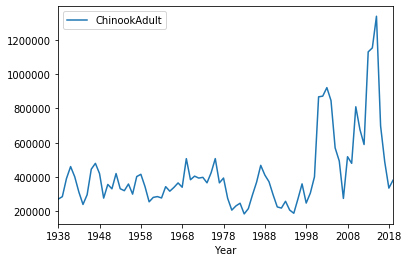

In [7]:
chinookAdult_bon_df.plot(kind='line',x='Year',y='ChinookAdult')

In [16]:
oftfrfbf_df = dam_fish_df[['Year','Dam','ChinookAdult','Steelhead','Sockeye']]
year_to_int = {'Year':int}
oftfrfbf_df = oftfrfbf_df.astype(year_to_int)
oftfrfbf_70_df = oftfrfbf_df[oftfrfbf_df['Year'] >= 1970]
oftfrfbf_bon_df = oftfrfbf_70_df[oftfrfbf_70_df['Dam'] == 'BON']
oftfrfbf_mcn_df = oftfrfbf_70_df[oftfrfbf_70_df['Dam'] == 'MCN']
oftfrfbf_jda_df = oftfrfbf_70_df[oftfrfbf_70_df['Dam'] == 'JDA']
oftfrfbf_tda_df = oftfrfbf_70_df[oftfrfbf_70_df['Dam'] == 'TDA']

#ftfrfbf_bon_df = oftfrfbf_bon_df.astype(year_to_int)
oftfrfbf_bon_df.head()

,Year,Dam,ChinookAdult,Steelhead,Sockeye
32,1970,BON,384780.0,113510.0,70762.0
33,1971,BON,405702.0,193966.0,87447.0
34,1972,BON,394456.0,185886.0,56323.0
35,1973,BON,398635.0,157823.0,58979.0
36,1974,BON,366759.0,137054.0,43837.0


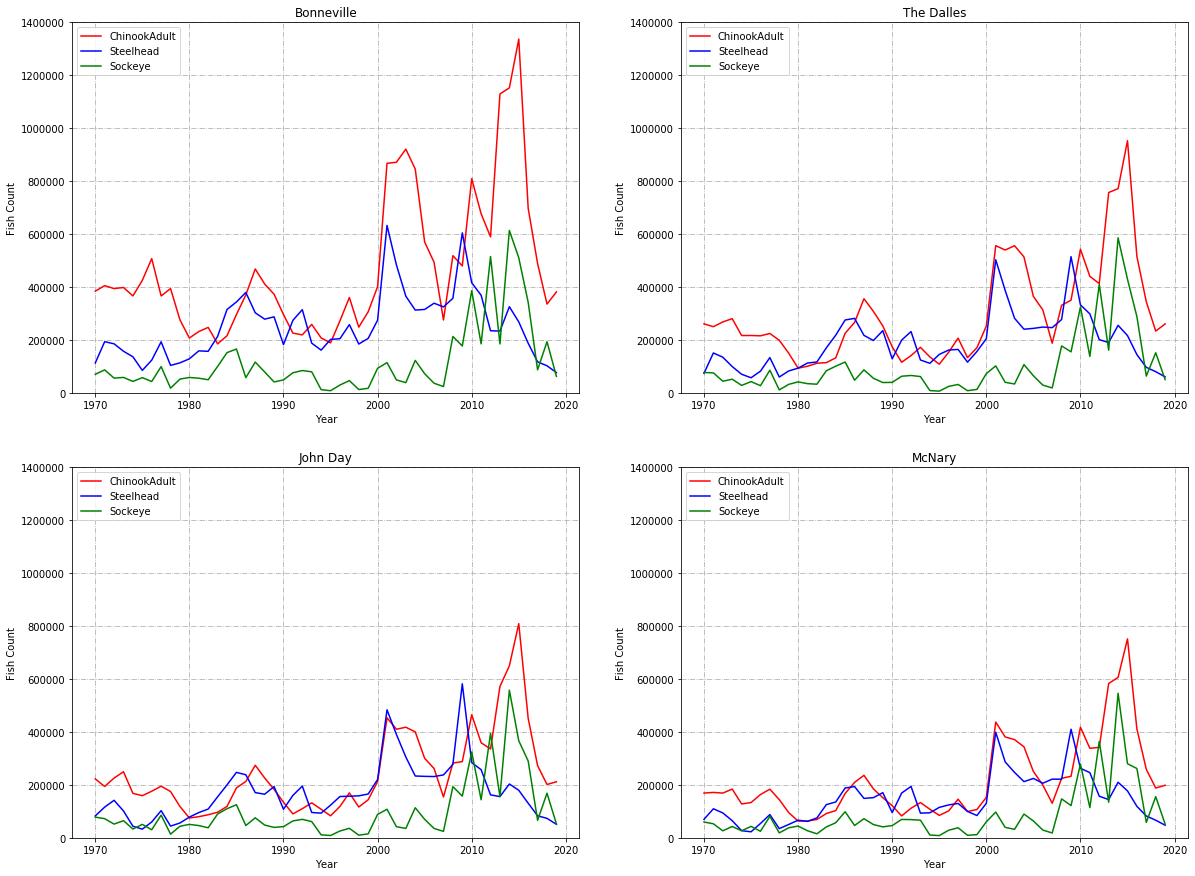

In [11]:
fig_line, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,15))

ax1.plot(oftfrfbf_bon_df['Year'],oftfrfbf_bon_df['ChinookAdult'], c = 'r', label='ChinookAdult')
ax1.plot(oftfrfbf_bon_df['Year'],oftfrfbf_bon_df['Steelhead'], c = 'b', label='Steelhead')
ax1.plot(oftfrfbf_bon_df['Year'],oftfrfbf_bon_df['Sockeye'], c = 'g', label='Sockeye')
ax1.set_title('Bonneville')
ax1.set(xlabel='Year',ylabel='Fish Count')
ax1.legend(loc="upper left")
ax1.set_ylim([0,1400000])
ax1.grid(linestyle = '-.')

ax2.plot(oftfrfbf_tda_df['Year'],oftfrfbf_tda_df['ChinookAdult'], c = 'r', label='ChinookAdult')
ax2.plot(oftfrfbf_tda_df['Year'],oftfrfbf_tda_df['Steelhead'], c = 'b', label='Steelhead')
ax2.plot(oftfrfbf_tda_df['Year'],oftfrfbf_tda_df['Sockeye'], c = 'g', label='Sockeye')
ax2.set_title('The Dalles')
ax2.set(xlabel='Year',ylabel='Fish Count')
ax2.legend(loc="upper left")
ax2.set_ylim([0,1400000])
ax2.grid(linestyle = '-.')

ax3.plot(oftfrfbf_jda_df['Year'],oftfrfbf_jda_df['ChinookAdult'], c = 'r', label='ChinookAdult')
ax3.plot(oftfrfbf_jda_df['Year'],oftfrfbf_jda_df['Steelhead'], c = 'b', label='Steelhead')
ax3.plot(oftfrfbf_jda_df['Year'],oftfrfbf_jda_df['Sockeye'], c = 'g', label='Sockeye')
ax3.set_title('John Day')
ax3.set(xlabel='Year',ylabel='Fish Count')
ax3.legend(loc="upper left")
ax3.set_ylim([0,1400000])
ax3.grid(linestyle = '-.')

ax4.plot(oftfrfbf_mcn_df['Year'],oftfrfbf_mcn_df['ChinookAdult'], c = 'r', label='ChinookAdult')
ax4.plot(oftfrfbf_mcn_df['Year'],oftfrfbf_mcn_df['Steelhead'], c = 'b', label='Steelhead')
ax4.plot(oftfrfbf_mcn_df['Year'],oftfrfbf_mcn_df['Sockeye'], c = 'g', label='Sockeye')
ax4.set_title('McNary')
ax4.set(xlabel='Year',ylabel='Fish Count')
ax4.legend(loc="upper left")
ax4.set_ylim([0,1400000])
ax4.grid(linestyle = '-.')


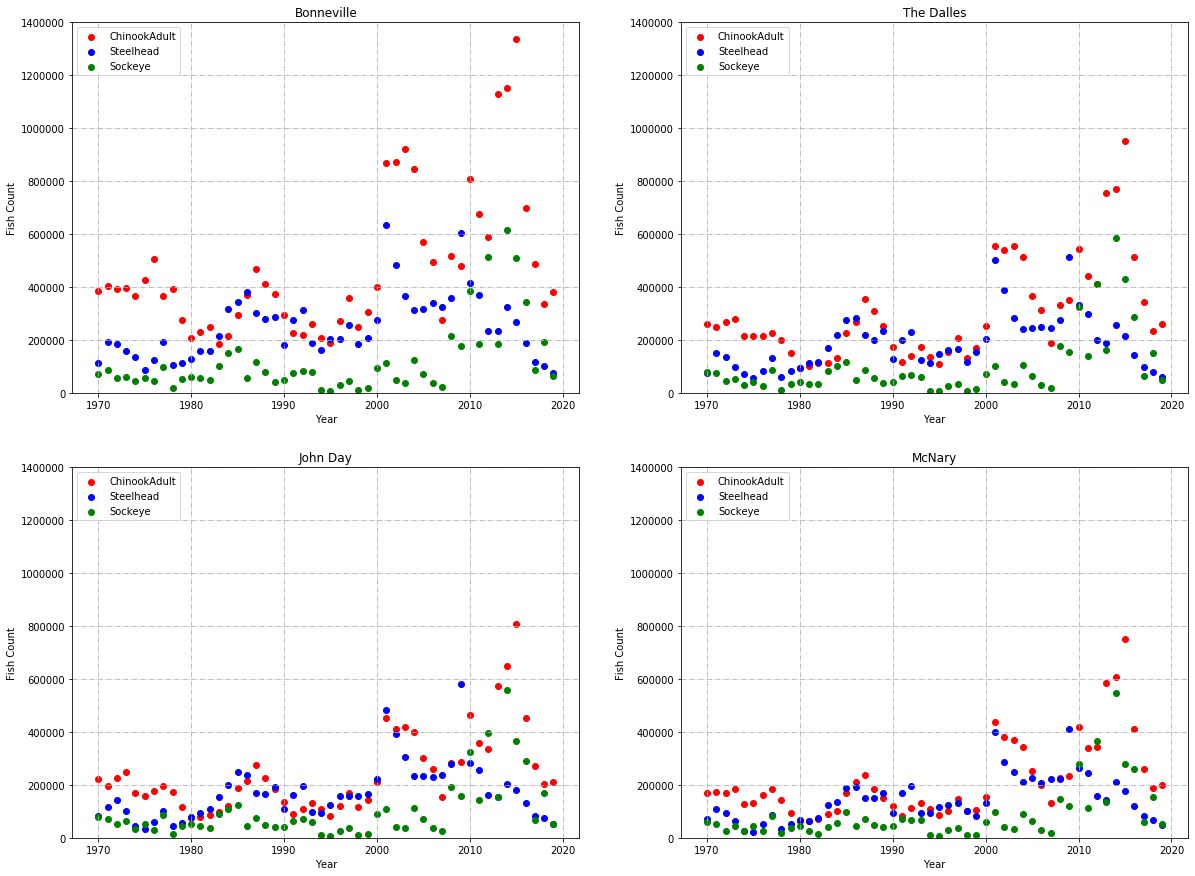

In [12]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,15))

ax1.scatter(oftfrfbf_bon_df['Year'],oftfrfbf_bon_df['ChinookAdult'], c = 'r', label='ChinookAdult')
ax1.scatter(oftfrfbf_bon_df['Year'],oftfrfbf_bon_df['Steelhead'], c = 'b', label='Steelhead')
ax1.scatter(oftfrfbf_bon_df['Year'],oftfrfbf_bon_df['Sockeye'], c = 'g', label='Sockeye')
ax1.set_title('Bonneville')
ax1.set(xlabel='Year',ylabel='Fish Count')
ax1.legend(loc="upper left")
ax1.set_ylim([0,1400000])
ax1.grid(linestyle = '-.')

ax2.scatter(oftfrfbf_tda_df['Year'],oftfrfbf_tda_df['ChinookAdult'], c = 'r', label='ChinookAdult')
ax2.scatter(oftfrfbf_tda_df['Year'],oftfrfbf_tda_df['Steelhead'], c = 'b', label='Steelhead')
ax2.scatter(oftfrfbf_tda_df['Year'],oftfrfbf_tda_df['Sockeye'], c = 'g', label='Sockeye')
ax2.set_title('The Dalles')
ax2.set(xlabel='Year',ylabel='Fish Count')
ax2.legend(loc="upper left")
ax2.set_ylim([0,1400000])
ax2.grid(linestyle = '-.')

ax3.scatter(oftfrfbf_jda_df['Year'],oftfrfbf_jda_df['ChinookAdult'], c = 'r', label='ChinookAdult')
ax3.scatter(oftfrfbf_jda_df['Year'],oftfrfbf_jda_df['Steelhead'], c = 'b', label='Steelhead')
ax3.scatter(oftfrfbf_jda_df['Year'],oftfrfbf_jda_df['Sockeye'], c = 'g', label='Sockeye')
ax3.set_title('John Day')
ax3.set(xlabel='Year',ylabel='Fish Count')
ax3.legend(loc="upper left")
ax3.set_ylim([0,1400000])
ax3.grid(linestyle = '-.')

ax4.scatter(oftfrfbf_mcn_df['Year'],oftfrfbf_mcn_df['ChinookAdult'], c = 'r', label='ChinookAdult')
ax4.scatter(oftfrfbf_mcn_df['Year'],oftfrfbf_mcn_df['Steelhead'], c = 'b', label='Steelhead')
ax4.scatter(oftfrfbf_mcn_df['Year'],oftfrfbf_mcn_df['Sockeye'], c = 'g', label='Sockeye')
ax4.set_title('McNary')
ax4.set(xlabel='Year',ylabel='Fish Count')
ax4.legend(loc="upper left")
ax4.set_ylim([0,1400000])
ax4.grid(linestyle = '-.')



In [13]:
#fig.savefig('rough_draft_3')
fig_line.savefig('2x2line')

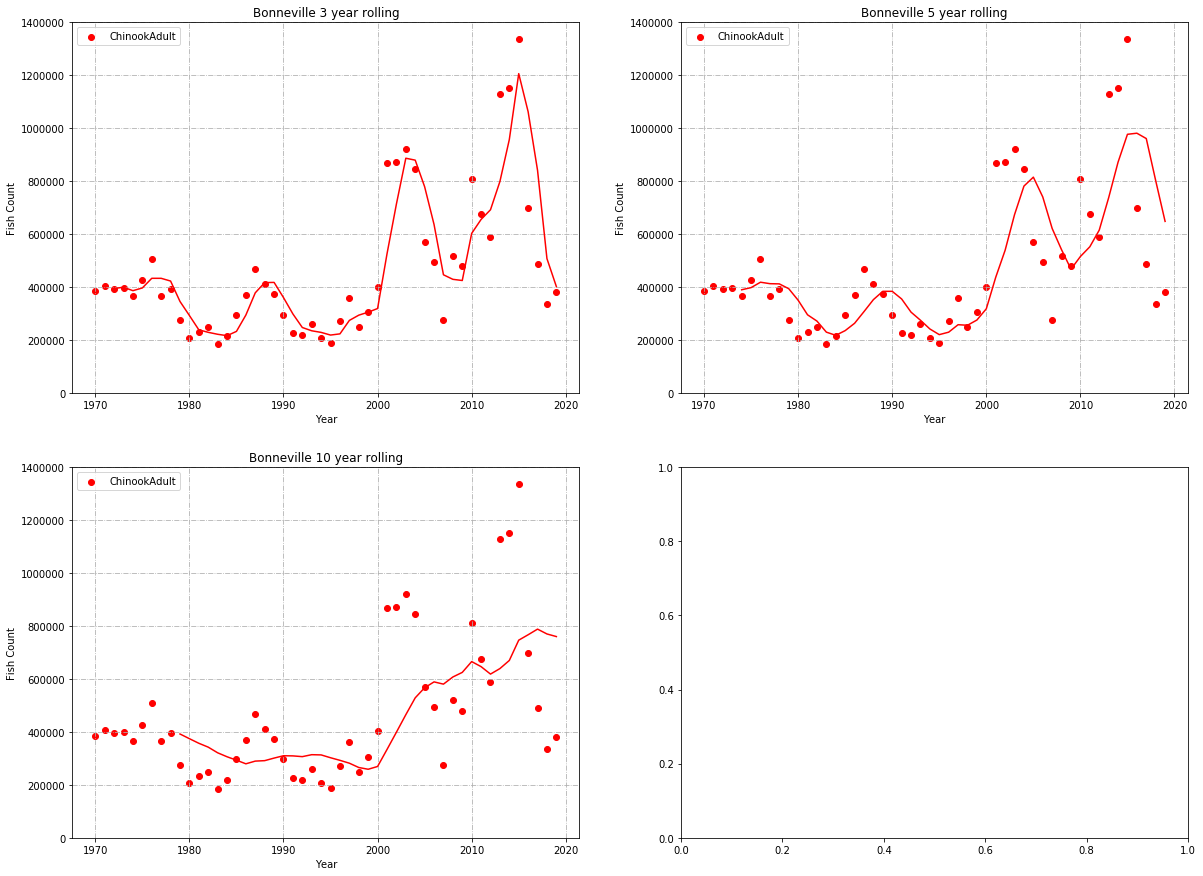

In [23]:
#ax1.scatter(oftfrfbf_bon_df['Year'],oftfrfbf_bon_df['ChinookAdult'], c = 'r', label='ChinookAdult')
test_roller_3 = oftfrfbf_bon_df['ChinookAdult'].rolling(window=3).mean()
test_roller_5 = oftfrfbf_bon_df['ChinookAdult'].rolling(window=5).mean()
test_roller_10 = oftfrfbf_bon_df['ChinookAdult'].rolling(window=10).mean()

fig_roll_test, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,15))

ax1.scatter(oftfrfbf_bon_df['Year'],oftfrfbf_bon_df['ChinookAdult'], c = 'r', label='ChinookAdult')
#ax1.scatter(oftfrfbf_bon_df['Year'],oftfrfbf_bon_df['Steelhead'], c = 'b', label='Steelhead')
#ax1.scatter(oftfrfbf_bon_df['Year'],oftfrfbf_bon_df['Sockeye'], c = 'g', label='Sockeye')
ax1.plot(oftfrfbf_bon_df['Year'],test_roller_3, c = 'r')
ax1.set_title('Bonneville 3 year rolling')
ax1.set(xlabel='Year',ylabel='Fish Count')
ax1.legend(loc="upper left")
ax1.set_ylim([0,1400000])
ax1.grid(linestyle = '-.')

ax2.scatter(oftfrfbf_bon_df['Year'],oftfrfbf_bon_df['ChinookAdult'], c = 'r', label='ChinookAdult')
#ax2.scatter(oftfrfbf_bon_df['Year'],oftfrfbf_bon_df['Steelhead'], c = 'b', label='Steelhead')
#ax2.scatter(oftfrfbf_bon_df['Year'],oftfrfbf_bon_df['Sockeye'], c = 'g', label='Sockeye')
ax2.plot(oftfrfbf_bon_df['Year'],test_roller_5, c = 'r')
ax2.set_title('Bonneville 5 year rolling')
ax2.set(xlabel='Year',ylabel='Fish Count')
ax2.legend(loc="upper left")
ax2.set_ylim([0,1400000])
ax2.grid(linestyle = '-.')

ax3.scatter(oftfrfbf_bon_df['Year'],oftfrfbf_bon_df['ChinookAdult'], c = 'r', label='ChinookAdult')
#ax3.scatter(oftfrfbf_bon_df['Year'],oftfrfbf_bon_df['Steelhead'], c = 'b', label='Steelhead')
#ax3.scatter(oftfrfbf_bon_df['Year'],oftfrfbf_bon_df['Sockeye'], c = 'g', label='Sockeye')
ax3.plot(oftfrfbf_bon_df['Year'],test_roller_10, c = 'r')
ax3.set_title('Bonneville 10 year rolling')
ax3.set(xlabel='Year',ylabel='Fish Count')
ax3.legend(loc="upper left")
ax3.set_ylim([0,1400000])
ax3.grid(linestyle = '-.')

In [24]:
fig_roll_test.savefig('test_rolling_average')